<a href="https://colab.research.google.com/github/Jihanablh/ml_classification_visuals/blob/main/ml_model_comparison_digits_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

digits = datasets.load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)

KNN Accuracy: 0.97


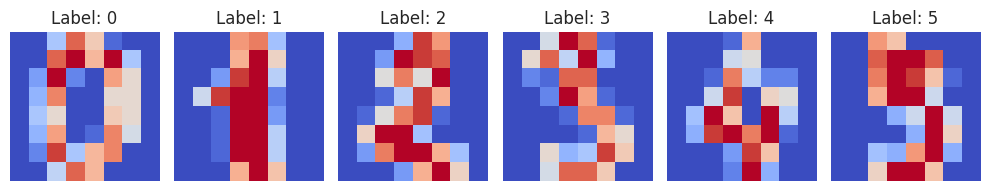

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}')

fig, axes = plt.subplots(1, 6, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='coolwarm')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Decision Tree Model

Decision Tree Accuracy: 0.84


<ipython-input-68-149b18634a98>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(y, bins=np.arange(len(np.unique(y)) + 1) - 0.5, kde=False, discrete=True, palette=colors, alpha=0.8)


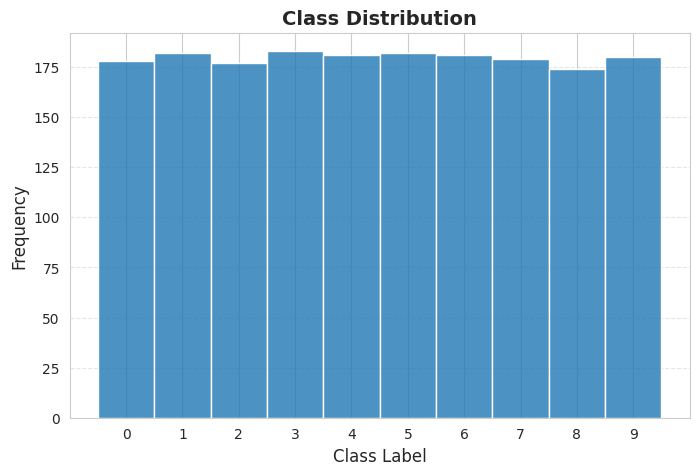

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}')

# Visualisasi Distribusi Kelas
plt.figure(figsize=(8, 5))
colors = sns.color_palette("pastel", n_colors=len(np.unique(y)))
sns.histplot(y, bins=np.arange(len(np.unique(y)) + 1) - 0.5, kde=False, discrete=True, palette=colors, alpha=0.8)

plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(range(len(np.unique(y))))
plt.grid(axis='y', linestyle='dashed', alpha=0.5)
plt.show()

# Support Vector Machine (SVM) & Confusion Matrix

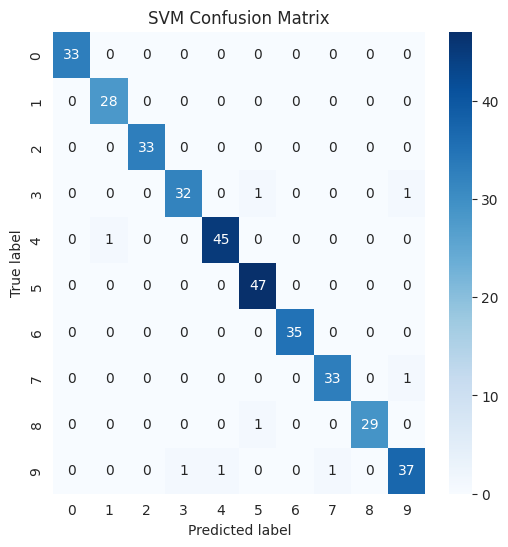

In [ ]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("SVM Confusion Matrix")
plt.show()

# Random Forest Forest Decision Boundary (PCA)

Random Forest Accuracy: 1.00


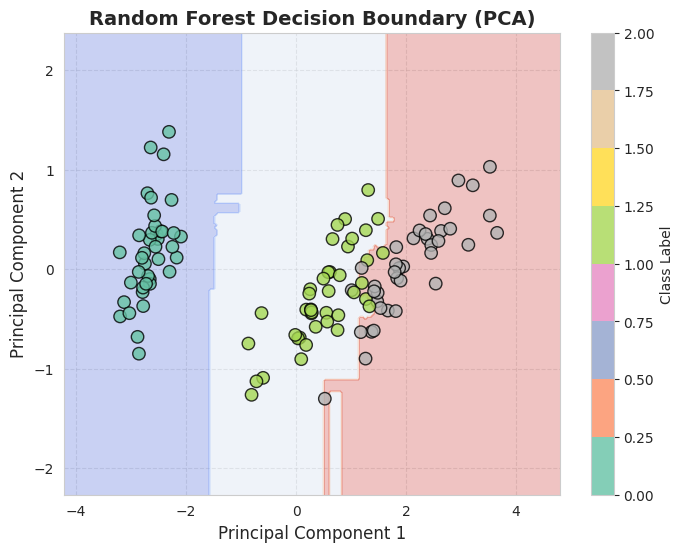

In [ ]:
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# PCA untuk reduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)
X_train_pca = pca.transform(X_train_iris)
X_test_pca = pca.transform(X_test_iris)

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_pca, y_train_iris)
y_pred_rf = rf.predict(X_test_pca)
print(f'Random Forest Accuracy: {accuracy_score(y_test_iris, y_pred_rf):.2f}')

# Visualisasi Decision Boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

jitter = np.random.normal(0, 0.1, X_train_pca.shape)
X_train_pca_jittered = X_train_pca + jitter

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
scatter = plt.scatter(
    X_train_pca_jittered[:, 0],
    X_train_pca_jittered[:, 1],
    c=y_train_iris,
    edgecolors='k',
    cmap="Set2",
    alpha=0.8,
    s=80
)

plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("Random Forest Decision Boundary (PCA)", fontsize=14, fontweight="bold")
plt.colorbar(scatter, label="Class Label")
plt.grid(linestyle='dashed', alpha=0.5)
plt.show()

# Dataset Visualized (PCA)

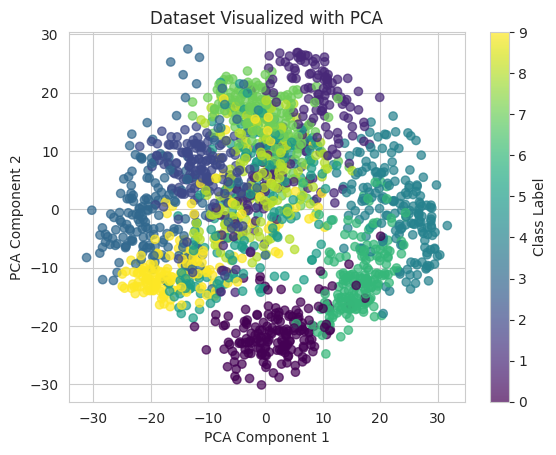

In [ ]:
X_pca_digits = pca.fit_transform(X)
plt.scatter(X_pca_digits[:, 0], X_pca_digits[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Class Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Dataset Visualized with PCA')
plt.show()